<a href="https://colab.research.google.com/github/Spider932/extra_projekt/blob/main/Extra_projekt_SDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
air = pd.read_csv('/content/sample_data/sensor06_air.txt', header = None)
water = pd.read_csv('/content/sample_data/sensor06_water.txt', header = None)
izopropanol = pd.read_csv('/content/sample_data/sensor06_izopropanol.txt', header = None)
air.columns = ('wavelength', 'amplitude_air')
water.columns = ('wavelength', 'amplitude_water')
izopropanol.columns = ('wavelength', 'amplitude_izopro')

In [ ]:
water.head()

,wavelength,amplitude_water
0,0.000001,8.7331
1,0.000001,8.7934
2,0.000001,8.7887
3,0.000001,8.7277
4,0.000001,8.7171


In [ ]:
water.head(5)

,wavelength,amplitude_water
0,0.000001,8.7331
1,0.000001,8.7934
2,0.000001,8.7887
3,0.000001,8.7277
4,0.000001,8.7171


In [ ]:
izopropanol.head(5)

,wavelength,amplitude_izopro
0,0.000001,8.8085
1,0.000001,9.0038
2,0.000001,8.9254
3,0.000001,8.8786
4,0.000001,8.8290


In [ ]:
print(air.index)
print(water.index)
print(izopropanol.index)


RangeIndex(start=0, stop=3001, step=1)
RangeIndex(start=0, stop=3001, step=1)
RangeIndex(start=0, stop=3001, step=1)


In [ ]:
new_df = pd.merge(air, water, on='wavelength', how='inner')

In [ ]:
new_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000],
           dtype='int64', length=3001)

In [ ]:
new_df.head()

,wavelength,amplitude_air,amplitude_water
0,0.000001,9.4554,8.7331
1,0.000001,9.6052,8.7934
2,0.000001,9.6264,8.7887
3,0.000001,9.5136,8.7277
4,0.000001,9.4042,8.7171


In [ ]:
sensor_df = pd.merge(new_df,izopropanol, on='wavelength',how='inner')

In [ ]:
sensor_df.head()

,wavelength,amplitude_air,amplitude_water,amplitude_izopro
0,0.000001,9.4554,8.7331,8.8085
1,0.000001,9.6052,8.7934,9.0038
2,0.000001,9.6264,8.7887,8.9254
3,0.000001,9.5136,8.7277,8.8786
4,0.000001,9.4042,8.7171,8.8290


In [ ]:
sensor_df.info


<bound method DataFrame.info of       wavelength  amplitude_air  amplitude_water  amplitude_izopro
0       0.000001         9.4554           8.7331            8.8085
1       0.000001         9.6052           8.7934            9.0038
2       0.000001         9.6264           8.7887            8.9254
3       0.000001         9.5136           8.7277            8.8786
4       0.000001         9.4042           8.7171            8.8290
...          ...            ...              ...               ...
2996    0.000002         2.4787          -1.8323           -1.5332
2997    0.000002         2.9384          -1.7141           -1.3984
2998    0.000002         2.4859          -1.9062           -1.4084
2999    0.000002         2.9317          -1.7105           -1.1342
3000    0.000002         2.8220          -1.5242           -1.0098

[3001 rows x 4 columns]>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters


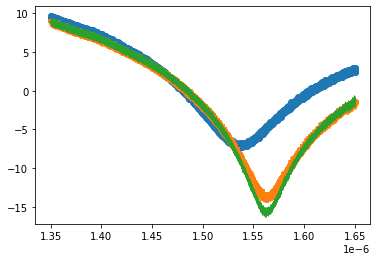

In [ ]:
n = 31
fig, ax = plt.subplots()

ax.plot(sensor_df.wavelength, sensor_df['amplitude_air'],marker='o')
ax.plot(sensor_df.wavelength, sensor_df['amplitude_water'],marker='v')
ax.plot(sensor_df.wavelength, sensor_df['amplitude_izopro'],marker='|')



plt.show()